In [1]:
# First step, importer les bibliotheques.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.patches as mpatches
import os
from tensorflow.keras import callbacks 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/projet/"
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/projet
 400-45.ipynb			      data	        Untitled0.ipynb
 400_45.py			      model_400.h5
'Copie de Copie de rnn-final.ipynb'   rnn_final.ipynb


In [4]:
dossier = os.listdir('data')
dossier


['agibtc.csv',
 'agieth.csv',
 'aidusd.csv',
 'ampust.csv',
 'ampusd.csv',
 'ampbtc.csv',
 'avtbtc.csv',
 'babbtc.csv',
 'avtusd.csv',
 'avteth.csv',
 'babusd.csv',
 'batbtc.csv',
 'bateth.csv',
 'batusd.csv',
 'bcibtc.csv',
 'bciusd.csv',
 'bftbtc.csv',
 'bftusd.csv',
 'bsvbtc.csv',
 'bfteth.csv',
 'bsvusd.csv',
 'btceur.csv',
 'btcgbp.csv',
 'btcjpy.csv',
 'xautf0ustf0.csv',
 'xautust.csv',
 'wtceth.csv',
 'xlmgbp.csv',
 'xautbtc.csv',
 'wpreth.csv',
 'wprusd.csv',
 'xlmjpy.csv',
 'xlmeur.csv',
 'xautusd.csv',
 'waxusd.csv',
 'wlousd.csv',
 'wtcusd.csv',
 'waxbtc.csv',
 'xcheth.csv',
 'xchusd.csv',
 'xrausd.csv',
 'xraeth.csv',
 'xvgeur.csv',
 'xvggbp.csv',
 'xvgeth.csv',
 'xvgjpy.csv',
 'zcnusd.csv',
 'zcnbtc.csv',
 'zilusd.csv',
 'zrxdai.csv',
 'zileth.csv',
 'zilbtc.csv',
 'algusd.csv',
 'absusd.csv',
 'abseth.csv',
 'aideth.csv',
 'aiobtc.csv',
 'asteth.csv',
 'algust.csv',
 'astusd.csv',
 'atmbtc.csv',
 'algbtc.csv',
 'aiousd.csv',
 'antbtc.csv',
 'aioeth.csv',
 'aucbtc.csv',
 '

In [5]:
dossierCryp =[]
for file in dossier :
  if(file[:6] == "ethusd" or file[:6] == "btcusd" or file[:6] == "ltcusd"):
    dossierCryp.append(file)
dossierCryp

[]

In [6]:
#loading the data.
df = pd.DataFrame()

# for file in dossierCryp: 
#   df=pd.concat([df,pd.read_csv("data/"+file)],axis = 0)


df = pd.read_csv("data/btceur.csv")

#Transformer les valeurs timestamps en Date pour plus de compréhension
df['date'] = pd.to_datetime(df['time'],unit='ms').dt.date
df.head()

,time,open,close,high,low,volume,date
0,1495181760000,1775.951536,1775.951536,1775.951536,1775.951536,0.010000,2017-05-19
1,1495365120000,1877.000000,1877.100000,1877.100000,1877.000000,12.802000,2017-05-21
2,1495365720000,1877.300000,1877.300000,1877.300000,1877.300000,0.135183,2017-05-21
3,1495365780000,1877.300000,1877.300000,1877.300000,1877.300000,1.148000,2017-05-21
4,1495365840000,1877.300000,1877.300000,1877.300000,1877.300000,5.024617,2017-05-21


### Ce que nous souhaitons analyser, c'est les fluctuations des valeurs d'ouverture et de fermeture du marché, en fonction des jours.
### Nous passons des données à la minute, à des données journalières.

In [7]:
# Ce que nous souhaitons analyser, c'est les fluctuations des valeurs d'ouverture et de fermeture du marché, en fonction des jours.
#Nous passons des données à la minute, à des données journalières.

group = df.groupby('date')
group.count()

,time,open,close,high,low,volume
date,,,,,,
2017-05-19,1,1,1,1,1,1
2017-05-21,48,48,48,48,48,48
2017-05-22,357,357,357,357,357,357
2017-05-23,119,119,119,119,119,119
2017-05-24,192,192,192,192,192,192
...,...,...,...,...,...,...
2020-03-07,745,745,745,745,745,745
2020-03-08,950,950,950,950,950,950
2020-03-09,1151,1151,1151,1151,1151,1151


### Avec le groupby, nous groupant les valeurs de chaque date et nous allons calculer une moyenne de ces valeurs qu'on utilisera pour cette date.

### Nous remarquons déja que par jour nous n'avons pas le même nombre de valeur, ce qui justifie encore plus le groupby et le calcul de la moyenne afin de normaliser un peu les données. (car par exemple : le 26/08/2020 a beaucoup plus de valeur -1154- que le 19/05/2017 qui a 1 valeur, nous evitons alors un désiquilibre)

### **Comme, ce que nous souhatons prédire est la valeur de close à chaque journée, nous allons récupèreré cette valeur et la stocker dans Real-Price**


In [8]:
Real_Price = group['close'].mean()
Real_Price

date
2017-05-19    1775.951536
2017-05-21    1831.338208
2017-05-22    1918.485168
2017-05-23    1962.490820
2017-05-24    2085.493066
                 ...     
2020-03-07    8038.937950
2020-03-08    7566.809838
2020-03-09    6929.505081
2020-03-10    7027.653223
2020-03-11    6941.456093
Name: close, Length: 1018, dtype: float64

In [9]:
Plot_Real_price = pd.DataFrame(Real_Price)
Plot_Real_price

,close
date,
2017-05-19,1775.951536
2017-05-21,1831.338208
2017-05-22,1918.485168
2017-05-23,1962.490820
2017-05-24,2085.493066
...,...
2020-03-07,8038.937950
2020-03-08,7566.809838
2020-03-09,6929.505081


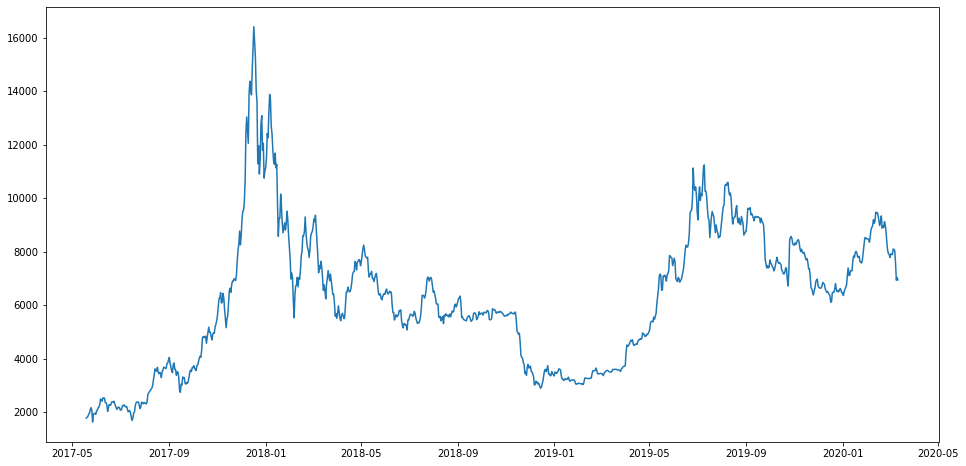

In [10]:
plt.figure(figsize=(16,8))
plt.plot(Plot_Real_price.index,Plot_Real_price['close'])

In [11]:
Real_Price.tail()

date
2020-03-07    8038.937950
2020-03-08    7566.809838
2020-03-09    6929.505081
2020-03-10    7027.653223
2020-03-11    6941.456093
Name: close, dtype: float64

### Ici nous allons nous fixer le nombre de jours sur lequel nous souhaitons prédire nos valeurs
### **Nous nous fixons 30 jours, le but n'étant pas de prédire des valeurs juste au jours près, mais plutôt de prédire les fluctuations eventuelles de la cryptomonnaie**

In [12]:
# Split des données en deux echantillons de train et de test

prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

### **Processing des données :**
#### Ici nous allons normaliser nos données avec la fonction MinMaxScaler, qui va venir ré-echantilloner notre dataset.

In [13]:
df_train.head()


date
2017-05-19    1775.951536
2017-05-21    1831.338208
2017-05-22    1918.485168
2017-05-23    1962.490820
2017-05-24    2085.493066
Name: close, dtype: float64

In [14]:
training_set = df_train.values
training_set

array([ 1775.9515356 ,  1831.33820789,  1918.4851676 ,  1962.49082013,
        2085.49306572,  2166.39012257,  2076.44491256,  1627.588228  ,
        1923.37062627,  1947.4764157 ,  1950.37817518,  1912.93008188,
        2042.63422424,  2070.72249632,  2159.57008759,  2185.7526994 ,
        2276.60518089,  2488.4500592 ,  2458.96414249,  2404.71349712,
        2525.97491692,  2533.62268259,  2522.82828943,  2360.10323153,
        2351.19135169,  2276.34205879,  2025.89325575,  2164.51675989,
        2278.01376116,  2259.14114905,  2261.39249026,  2375.96580061,
        2380.41151627,  2366.87763241,  2406.23441028,  2304.89609387,
        2238.12139858,  2140.41404285,  2100.98632564,  2177.23131222,
        2181.67831462,  2162.53065282,  2076.06409461,  2070.54709339,
        2139.54959898,  2244.12137131,  2245.10791776,  2269.32327356,
        2209.57308124,  2192.09443937,  2212.84372842,  2110.27474574,
        2010.25281686,  2032.98028791,  2056.88206724,  1958.17189007,
      

In [15]:
training_set = np.reshape(training_set, (len(training_set), 1))
training_set

array([[ 1775.9515356 ],
       [ 1831.33820789],
       [ 1918.4851676 ],
       [ 1962.49082013],
       [ 2085.49306572],
       [ 2166.39012257],
       [ 2076.44491256],
       [ 1627.588228  ],
       [ 1923.37062627],
       [ 1947.4764157 ],
       [ 1950.37817518],
       [ 1912.93008188],
       [ 2042.63422424],
       [ 2070.72249632],
       [ 2159.57008759],
       [ 2185.7526994 ],
       [ 2276.60518089],
       [ 2488.4500592 ],
       [ 2458.96414249],
       [ 2404.71349712],
       [ 2525.97491692],
       [ 2533.62268259],
       [ 2522.82828943],
       [ 2360.10323153],
       [ 2351.19135169],
       [ 2276.34205879],
       [ 2025.89325575],
       [ 2164.51675989],
       [ 2278.01376116],
       [ 2259.14114905],
       [ 2261.39249026],
       [ 2375.96580061],
       [ 2380.41151627],
       [ 2366.87763241],
       [ 2406.23441028],
       [ 2304.89609387],
       [ 2238.12139858],
       [ 2140.41404285],
       [ 2100.98632564],
       [ 2177.23131222],


In [16]:
# Processing des données
sc = MinMaxScaler()

training_set = sc.fit_transform(training_set)
training_set

array([[0.01003763],
       [0.01378486],
       [0.01968086],
       [0.02265809],
       [0.0309799 ],
       [0.03645306],
       [0.03036774],
       [0.        ],
       [0.02001139],
       [0.02164228],
       [0.0218386 ],
       [0.01930502],
       [0.02808026],
       [0.02998059],
       [0.03599164],
       [0.03776305],
       [0.04390974],
       [0.05824227],
       [0.05624738],
       [0.05257701],
       [0.06078104],
       [0.06129846],
       [0.06056815],
       [0.04955887],
       [0.04895593],
       [0.04389194],
       [0.02694763],
       [0.03632631],
       [0.04400504],
       [0.0427282 ],
       [0.04288051],
       [0.05063206],
       [0.05093284],
       [0.05001719],
       [0.05267991],
       [0.04582378],
       [0.04130609],
       [0.03469562],
       [0.03202811],
       [0.03718653],
       [0.03748739],
       [0.03619194],
       [0.03034198],
       [0.02996872],
       [0.03463714],
       [0.04171202],
       [0.04177877],
       [0.043

### Dans notre cas, comme nous n'avons pas de label y, nous allons en créer un.
### Nous allons supposé que la prédiction pour un jour donnée est celle du jours d'après.
Exemple : la prédiction pour le 30/06/2020 est la valeur du 01/07/2020. 

In [17]:
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]


In [18]:
X_train

array([[0.01003763],
       [0.01378486],
       [0.01968086],
       [0.02265809],
       [0.0309799 ],
       [0.03645306],
       [0.03036774],
       [0.        ],
       [0.02001139],
       [0.02164228],
       [0.0218386 ],
       [0.01930502],
       [0.02808026],
       [0.02998059],
       [0.03599164],
       [0.03776305],
       [0.04390974],
       [0.05824227],
       [0.05624738],
       [0.05257701],
       [0.06078104],
       [0.06129846],
       [0.06056815],
       [0.04955887],
       [0.04895593],
       [0.04389194],
       [0.02694763],
       [0.03632631],
       [0.04400504],
       [0.0427282 ],
       [0.04288051],
       [0.05063206],
       [0.05093284],
       [0.05001719],
       [0.05267991],
       [0.04582378],
       [0.04130609],
       [0.03469562],
       [0.03202811],
       [0.03718653],
       [0.03748739],
       [0.03619194],
       [0.03034198],
       [0.02996872],
       [0.03463714],
       [0.04171202],
       [0.04177877],
       [0.043

In [19]:
y_train

array([[0.01378486],
       [0.01968086],
       [0.02265809],
       [0.0309799 ],
       [0.03645306],
       [0.03036774],
       [0.        ],
       [0.02001139],
       [0.02164228],
       [0.0218386 ],
       [0.01930502],
       [0.02808026],
       [0.02998059],
       [0.03599164],
       [0.03776305],
       [0.04390974],
       [0.05824227],
       [0.05624738],
       [0.05257701],
       [0.06078104],
       [0.06129846],
       [0.06056815],
       [0.04955887],
       [0.04895593],
       [0.04389194],
       [0.02694763],
       [0.03632631],
       [0.04400504],
       [0.0427282 ],
       [0.04288051],
       [0.05063206],
       [0.05093284],
       [0.05001719],
       [0.05267991],
       [0.04582378],
       [0.04130609],
       [0.03469562],
       [0.03202811],
       [0.03718653],
       [0.03748739],
       [0.03619194],
       [0.03034198],
       [0.02996872],
       [0.03463714],
       [0.04171202],
       [0.04177877],
       [0.04341708],
       [0.039

In [20]:
X_train = np.reshape(X_train, (len(X_train), 1, 1))
X_train

array([[[0.01003763]],

       [[0.01378486]],

       [[0.01968086]],

       [[0.02265809]],

       [[0.0309799 ]],

       [[0.03645306]],

       [[0.03036774]],

       [[0.        ]],

       [[0.02001139]],

       [[0.02164228]],

       [[0.0218386 ]],

       [[0.01930502]],

       [[0.02808026]],

       [[0.02998059]],

       [[0.03599164]],

       [[0.03776305]],

       [[0.04390974]],

       [[0.05824227]],

       [[0.05624738]],

       [[0.05257701]],

       [[0.06078104]],

       [[0.06129846]],

       [[0.06056815]],

       [[0.04955887]],

       [[0.04895593]],

       [[0.04389194]],

       [[0.02694763]],

       [[0.03632631]],

       [[0.04400504]],

       [[0.0427282 ]],

       [[0.04288051]],

       [[0.05063206]],

       [[0.05093284]],

       [[0.05001719]],

       [[0.05267991]],

       [[0.04582378]],

       [[0.04130609]],

       [[0.03469562]],

       [[0.03202811]],

       [[0.03718653]],

       [[0.03748739]],

       [[0.03619

In [21]:
X_train.shape

(987, 1, 1)

**Test sur modèle 1**

In [22]:
es = callbacks.EarlyStopping (monitor='val_loss', min_delta=0.001, patience=20, verbose=1)
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(BatchNormalization()): Pour réduire le sur-apprentissage, en ajoutant un effet de régularisation.
model.add(LSTM(32))
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train, y_train, epochs=10000, batch_size=8, shuffle=False, validation_split = 0.1, callbacks=[es])

# Save the model
model.save('model_400.h5')


Epoch 1/10000
111/111 [==============================] - 1s 10ms/step - loss: 0.0458 - val_loss: 0.0087
Epoch 2/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0317 - val_loss: 0.0055
Epoch 3/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0053
Epoch 4/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0053
Epoch 5/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0053
Epoch 6/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0321 - val_loss: 0.0053
Epoch 7/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0321 - val_loss: 0.0053
Epoch 8/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0321 - val_loss: 0.0053
Epoch 9/10000
111/111 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.0053
Epoch 10/10000
111/111 [==============================] - 0s 2ms/step - 

### Nous allons ensuite charger les paramètres du modèle entrainé plus haut

In [23]:
model.load_weights("ethusd_btcusd_ltcusd_model.h5")

OSError: ignored

**model**

### Ici, nous allons tester notre modèle sur une prédiction de 30 jours
#### **Nous allons :**
    1)- Reshape les données test
    2)- Transformer et normaliser les données avec la même transformation que précédemment (car dans le dataset test nous avons beaucoup moins de données que le train, et comme le train et test sont supposé être de la même origine, alors la transformation doit être sur la totalité).
    3)- Prédire les valeurs de close
    4)- Re-transformer ces valeurs vers les valeurs d'origine

In [24]:
# Prédictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

In [25]:

predicted_BTC_price = model.predict(inputs)
predicted_BTC_price[0:10]

array([[0.34017158],
       [0.3405892 ],
       [0.34056523],
       [0.34055835],
       [0.3404241 ],
       [0.3401779 ],
       [0.33997303],
       [0.34015915],
       [0.34041724],
       [0.3398536 ]], dtype=float32)

In [26]:
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
predicted_BTC_price[0:10]

array([[6655.564 ],
       [6661.737 ],
       [6661.383 ],
       [6661.281 ],
       [6659.2964],
       [6655.6577],
       [6652.6294],
       [6655.3804],
       [6659.1953],
       [6650.8643]], dtype=float32)

In [27]:
df_test

date
2020-02-11    9134.756422
2020-02-12    9475.377855
2020-02-13    9455.841409
2020-02-14    9450.227491
2020-02-15    9340.715834
2020-02-16    9139.924414
2020-02-17    8972.847417
2020-02-18    9124.621889
2020-02-19    9335.130277
2020-02-20    8875.449042
2020-02-21    8951.949113
2020-02-22    8898.763917
2020-02-23    9116.053525
2020-02-24    8990.271117
2020-02-25    8741.542649
2020-02-26    8326.720760
2020-02-27    8048.129790
2020-02-28    7916.045886
2020-02-29    7895.429226
2020-03-01    7781.755962
2020-03-02    7910.391550
2020-03-03    7905.129709
2020-03-04    7888.701452
2020-03-05    8098.581168
2020-03-06    8082.899451
2020-03-07    8038.937950
2020-03-08    7566.809838
2020-03-09    6929.505081
2020-03-10    7027.653223
2020-03-11    6941.456093
Name: close, dtype: float64

### **Test sur Bitcoin**

#### **Test avec 100 epoch**
Nous remarquerons ici que les prédictions ne sont pas parfaite au niveau des valeurs ou des fluctuations, mais nous observons un tracet assez similaire sur les 30 jours

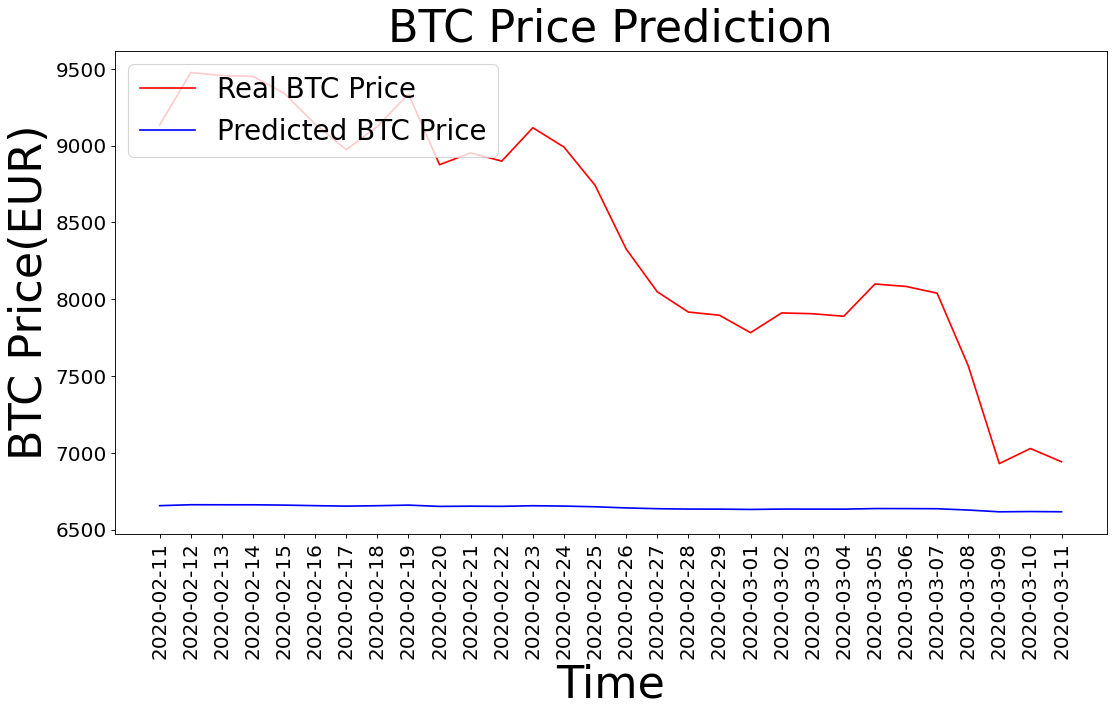

In [28]:
# Visualsation des résultats
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test_bis = df_test.reset_index()
x=df_test_bis.index
labels = df_test_bis['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(EUR)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
#plt.ylim(bottom=0)
plt.show()

#### **Test avec 200 epoch**

Nous remarquerons ici que les prédictions ne sont pas parfaite au niveau des valeurs, mais au niveau des fluctuations, une nette amélioration est remarquable par rapport au graphique d'avant.

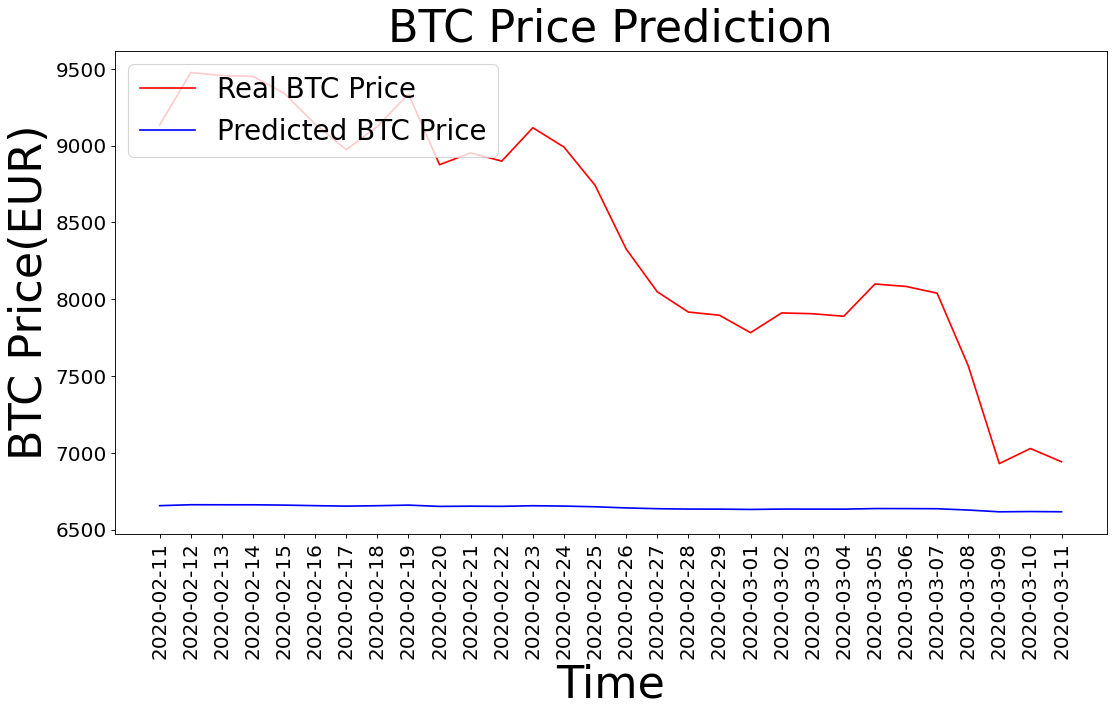

In [29]:
# Visualsation des résultats
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test_bis = df_test.reset_index()
x=df_test_bis.index
labels = df_test_bis['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(EUR)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
#plt.ylim(bottom=0)
plt.show()

#### **Test avec 300 epoch**

Nous remarquerons ici que les prédictions ne sont pas parfaite au niveau des valeurs, mais au niveau des fluctuations, une nette amélioration est remarquable par rapport au graphique d'avant.

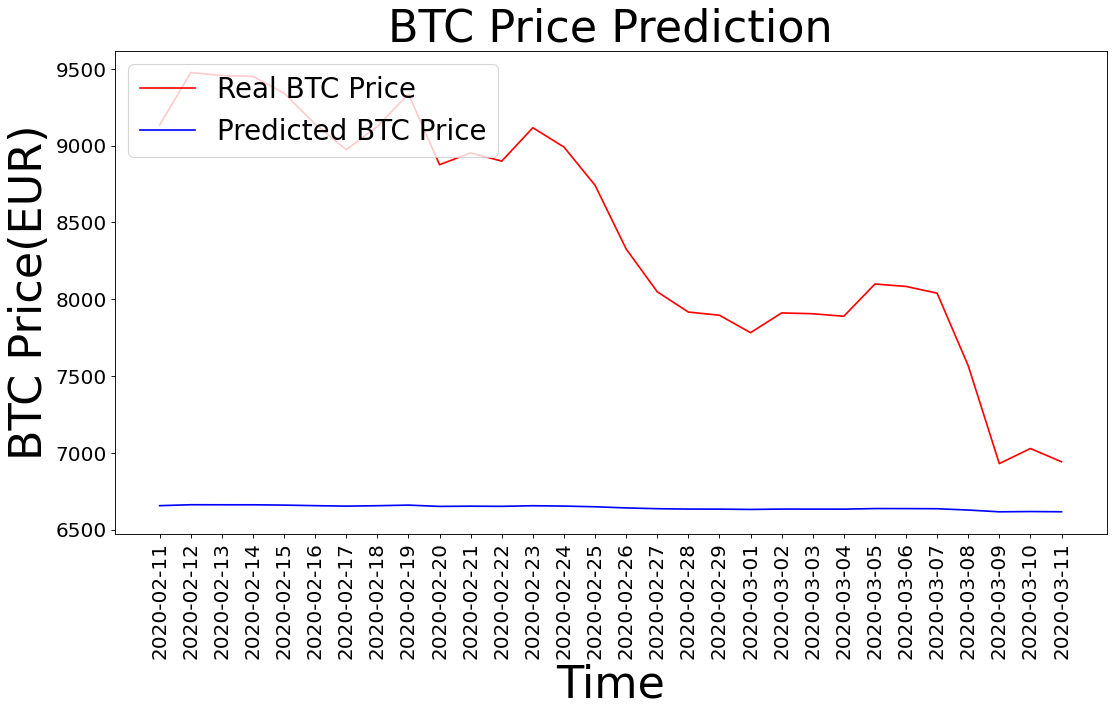

In [30]:
# Visualsation des résultats
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test_bis = df_test.reset_index()
x=df_test_bis.index
labels = df_test_bis['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(EUR)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
#plt.ylim(bottom=0)
plt.show()

#### **Test avec 400 epoch**

Nous remarquerons ici que les prédictions ne sont pas parfaite au niveau des valeurs, mais au niveau des fluctuations, une nette amélioration est remarquable par rapport au graphique d'avant.

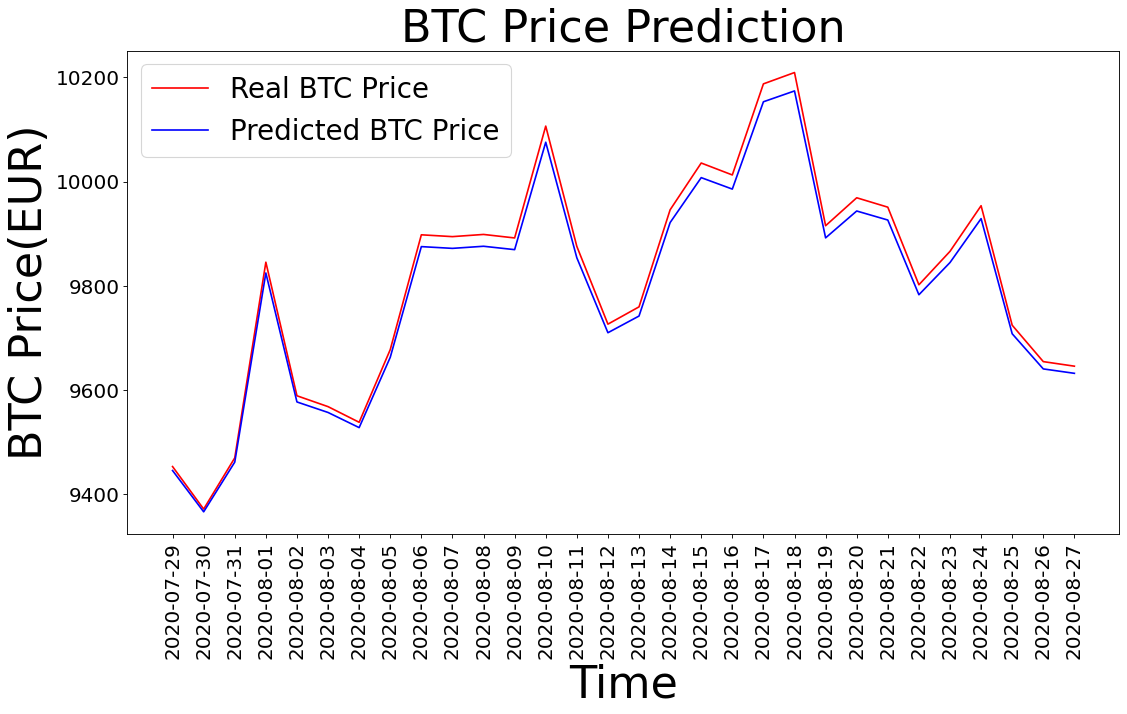

In [ ]:
# Visualsation des résultats
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test_bis = df_test.reset_index()
x=df_test_bis.index
labels = df_test_bis['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(EUR)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
#plt.ylim(bottom=0)
plt.show()

# **Autres Test**

## **Autre modèle**

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

In [ ]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

 ## **Autres tests sur différentes données**

**BTC + ETH + LTC With USD**

**BTC**

In [ ]:
#loading the data.
df = pd.read_csv("data/"+"ltcusd.csv")
df['date'] = pd.to_datetime(df['time'],unit='ms').dt.date
group = df.groupby('date')
Real_Price = group['close'].mean()

prediction_days = 100
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real LTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted LTC Price')
plt.title('LTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('LTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**ETH**

In [ ]:
#loading the data.
df = pd.read_csv("data/"+"ethusd.csv")
df['date'] = pd.to_datetime(df['time'],unit='ms').dt.date
group = df.groupby('date')
Real_Price = group['close'].mean()

prediction_days = 100
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real ETH Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted ETH Price')
plt.title('ETH Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('ETH Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**BTC + ETH** test du modèle sur les deux

**Avec les données mixtes BTC+ETH**

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC+ETH Price')
plt.title('BTC + ETH Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**BTC**

In [ ]:
#loading the data.
df = pd.read_csv("data/"+"btceur.csv")
df['date'] = pd.to_datetime(df['time'],unit='ms').dt.date
group = df.groupby('date')
Real_Price = group['close'].mean()

prediction_days = 100
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**ETH**

In [ ]:
#loading the data.
df = pd.read_csv("data/"+"etheur.csv")
df['date'] = pd.to_datetime(df['time'],unit='ms').dt.date
group = df.groupby('date')
Real_Price = group['close'].mean()

prediction_days = 100
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real ETH Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted ETH Price')
plt.title('ETH Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**BTC**

**btcusd**

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**btceur**

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**ETH**

**ethusd** avec apprentissage **btceur**

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**etheur**

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()